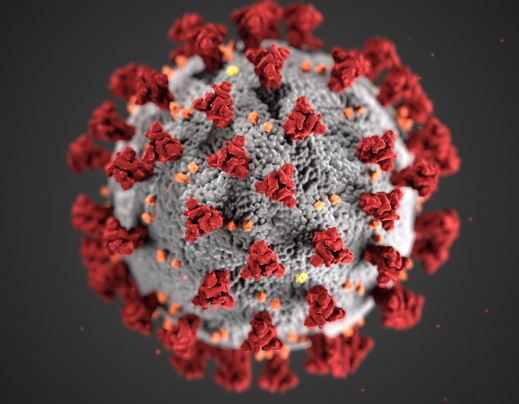

#                                  <font color='red'>Covid-19</font> Pandemic

#### **What is a coronavirus?**

Coronaviruses are a large family of viruses which may cause illness in animals or humans.  In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.

#### **What is COVID-19?**

COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019. COVID-19 is now a pandemic affecting many countries globally.

#### **How can we protect others and ourselves from COVID-19?**

Practicing hand and respiratory hygiene is important at ALL times and is the best way to protect others and yourself.

For more details : [Click here to view Official WHO website](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/q-a-coronaviruses) 

##### **WHO - World Health Organization**




# <font color='Blue'>Table of contents :</font>

> **Global Analysis**



*   Spread of virus in Global level over time

*   Countries and their cases

*   Daily Statistics of Cases along the world

*   Recovery and Mortality rates

*  10 Most Infected Countries Analysis



> **Country - India**



*   Indian Cases Over Time

*   Covid-19 in India

*   Spread of Covid-19 in India

*   Most Infected Indian States and their cases

*   Specific State Analysis : Tamil Nadu 

> **Why and How few are coming back from Covid-19** 

 
* Report on "How Hong Kong beat Corona virus and avoided Lockdown" by CNBC International






      








 



### <font color='green'>Kindly Upvote and Comment below after going through the notebook</font>  


Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import folium

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# <font color='Blue'>Global Analysis</font>

**Datasets**

**WHO** dataset is collected by downloading from official website

For downloading dataset : [Click here](https://covid19.who.int/WHO-COVID-19-global-data.csv)

**COVID-19** data is collected from Kaggle Dataset

For downloading dataset : [Click here](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv)

In [ ]:
df = pd.read_csv('../input/whocoviddata/WHO-COVID-19-global-data (4).csv')
covid = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [ ]:
who = df.rename({
      'Date_reported' : 'date',
      ' Country' : 'country',
      ' Cumulative_cases' : 'confirmed',
      ' Cumulative_deaths' : 'deaths',
      ' New_cases' : 'new_cases',
      ' New_deaths' : 'new_deaths'
  }, axis=1)

In [ ]:
covid.rename({
    'ObservationDate' : 'date',
    'Province/State' : 'state',
    'Country/Region' : 'country',
    'Confirmed' : 'confirmed',
    'Deaths' : 'deaths',
    'Recovered' : 'recovered'
}, axis=1, inplace=True)

In [ ]:
covid[['confirmed', 'deaths', 'recovered']] = covid[['confirmed', 'deaths', 'recovered']].astype(int)

covid['country'] = covid['country'].replace('Mainland China', 'China')

covid['active'] = covid.confirmed - covid.deaths - covid.recovered

In [ ]:
who_dates = who.groupby(['date'])[['confirmed', 'deaths']].sum().reset_index().sort_values("date",ascending=True).reset_index(drop=True)

We just remove last two days of COVID-19 dataset because of their incomplete updates

In [ ]:
who_dates.drop(who_dates.tail(1).index, inplace=True) # Removed last two days because of improper updates
who_dates.tail(1) # So last date taken for analysis is below

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=who_dates.date, y=who_dates.confirmed,
                    mode='lines+markers', name='Confirmed Cases'))

fig.add_trace(go.Scatter(x=who_dates.date, y=who_dates.deaths,
                    mode='lines+markers', name='Deaths'))

fig.update_layout(
    title='Evolution of Confirmed cases and Deaths over time in the world as per WHO',
    template='plotly_white',
    yaxis_title="Cases Identified",
    xaxis_title="",
)

fig.show()

## ***Wait where is the recovery and active cases!***

## **First lets see the world spread in map and then get into statistics of cases**

# <font color='Blue'>Spread of Covid-19 in Global level over time</font>

*From this we can see the spread of virus over time. So that we can come to clear idea about the origin and its spread.*


Getting country names and their dates 



In [ ]:
data_over_country= covid.groupby(['date', 'country'])[['confirmed', 'active', 'recovered', 'deaths']].sum().reset_index().sort_values('date', ascending=True).reset_index(drop=True)

In [ ]:
fig = px.choropleth(data_over_country, locations=data_over_country.country,
                    color=data_over_country.confirmed,locationmode='country names', 
                    hover_name=data_over_country.confirmed, 
                    color_continuous_scale=['#EAF0F1', '#3C40C6', '#8B78E6', '#2B2B52'],
                    animation_frame='date')
fig.update_layout(
    title='Evolution of confirmed cases In Each Country',
    template = 'plotly_white'
)
fig.show()

# <font color='Blue'>Countries and their cases</font>

*Here we will see the total cases count of countries through maps*

***Visualizations :*** 

1.    Confirmed Cases 

2.    Confirmed Cases 

3.    Recovered Cases

4.    Deaths



In [ ]:
last_date = covid[covid['date'] == max(covid['date'])].reset_index()
country_cases = last_date.groupby(['country'])[['confirmed', 'active', 'recovered', 'deaths']].sum().reset_index().sort_values("confirmed",ascending=False).reset_index(drop=True)

In [ ]:
fig = px.choropleth(country_cases, locations=country_cases.country,
                    color=country_cases.confirmed,locationmode='country names', 
                    hover_name=country_cases.confirmed, 
                    color_continuous_scale=['#EAF0F1', '#3C40C6', '#0A3D62', '#192A56'])
fig.update_layout(
    title={
        'text': 'Confirmed Cases In Each Country',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    
)
fig.show()

In [ ]:
fig = px.choropleth(country_cases, locations=country_cases.country,
                    color=country_cases.active,locationmode='country names', 
                    hover_name=country_cases.active, 
                    color_continuous_scale=['#EAF0F1', '#BB2CD9', '#E74292', '#BB2CD9'])
fig.update_layout(
    title={
        'text': 'Active Cases In Each Country',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.show()

In [ ]:
fig = px.choropleth(country_cases, locations=country_cases.country,
                    color=country_cases.recovered,locationmode='country names', 
                    hover_name=country_cases.recovered, 
                    color_continuous_scale=['#EAF0F1', '#45CE30', '#6AB04A', '#019031'])
fig.update_layout(
    title={
        'text': 'Recovered Cases In Each Country',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.show()

In [ ]:
fig = px.choropleth(country_cases, locations=country_cases.country,
                    color=country_cases.deaths,locationmode='country names', 
                    hover_name=country_cases.deaths, 
                    color_continuous_scale=['#EAF0F1', '#FF4848', '#FF362E', '#D63031'])
fig.update_layout(
    title={
        'text': 'Death In Each Country',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
fig.show()

# <font color='red'>Daily Statistics of Cases along the world</font>

*This is helps to see the spikes or changes in cases with time* 

***Visualizations :***

Confirmed, Active, Recovered, Deaths cases over Time in World

In [ ]:
data_over_time= covid.groupby(['date'])[['confirmed', 'active', 'recovered', 'deaths']].sum().reset_index().sort_values('date',ascending=True).reset_index(drop=True)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_over_time.date, y=data_over_time['confirmed'],
                    mode='lines',marker_color='#74B9FF',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=data_over_time.date, y=data_over_time['active'],
                    mode='lines',marker_color='#F3CC79', line=dict(dash='dot'),
                    name='Active cases'))

fig.add_trace(go.Scatter(x=data_over_time.date, y=data_over_time['recovered'],
                    mode='lines',marker_color='#45CE30', line=dict(dash='dot'),
                    name='Recovered cases'))

fig.add_trace(go.Scatter(x=data_over_time.date, y=data_over_time['deaths'],
                    mode='lines',marker_color='#FF3E4D', 
                    name='Death cases'))

fig.update_layout(
    title = {
        'text': 'Evolution of Cases over time in the world',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    template='plotly_dark',
    yaxis_title="Total cases",
    xaxis_title="No of Days - Starting from 22/01/2020"
)

fig.show()

# <font color='blue'>Recovery and Mortality rates of World over time</font>

*This shows how the rate varies over time and concludes that world is trying to recover fast*

Getting Mortality Rate and Recovery Rate per 100 for each day

In [ ]:
data_over_time['mortality_rate'] = np.round(100*data_over_time['deaths']/data_over_time['confirmed'],2)
data_over_time['recovery_rate'] = np.round(100*data_over_time['recovered']/data_over_time['confirmed'],2)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data_over_time.date, y=data_over_time['mortality_rate'],
    name='Mortality Rate', marker_color='#E71C23'
))

fig.add_trace(go.Scatter(
    x=data_over_time.date, y=data_over_time['recovery_rate'],
    name='Recovery Rate', marker_color='#43BE31'
))

fig.update_layout(
    title = {
        'text': 'Recovery and Mortality rates of World with Time',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    template='plotly_dark',
    xaxis_title = 'No of Days',
    yaxis_title = 'Rate Per 100'
)


fig.show()

# 10 Most Infected Countries Analysis

**Visualization :**

1.   Most Confirmed Cases and rates

2.   Countries overcame Covid-19 with high Recovery rate

3.   Countries with most deaths or Mortality rate




In [ ]:
country_cases['mortality_rate'] = np.round(100*country_cases['deaths']/country_cases['confirmed'], 2).astype(float)
country_cases['recovery_rate'] = np.round(100*country_cases['recovered']/country_cases['confirmed'], 2).astype(float)
country_rrate = pd.pivot_table(country_cases, index=['country'], values=['mortality_rate', 'confirmed', 'recovery_rate']).sort_values(by='recovery_rate',ascending=False).reset_index()
country_mrate = pd.pivot_table(country_cases, index=['country'], values=['mortality_rate', 'confirmed', 'recovery_rate']).sort_values(by='mortality_rate',ascending=False).reset_index()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
            x=country_cases['country'][0:10], y=country_cases['confirmed'][0:10],
            text=country_cases['confirmed'][0:10],
            textposition='auto',
        ))

fig.update_layout(
    title = {
        'text': '10 Most Invaded Countries by Covid-19',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Countries',
    yaxis_title = 'Confirmed cases in millions'
)

fig.show()

fig = go.Figure()

fig.add_trace(go.Bar(
            x=country_cases['country'][0:10], y=country_cases['mortality_rate'][0:10],
            marker_color = '#EC4849', name='Mortality Rate'
           
        ))

fig.add_trace(go.Bar(
            x=country_cases['country'][0:10], y=country_cases['recovery_rate'][0:10],
            marker_color = '#26ae60', name='Recovery Rate'
           
        ))

fig.update_layout(
    title = {
        'text': 'Mortality Rate of 10 Most Invaded Countries by Covid-19',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Countries',
    yaxis_title = 'Rate'
)

fig.show()

## Countries with most Recovery rate or almost Recovered from Covid-19

In [ ]:
country_rrate[:20].style.background_gradient(cmap='Greens',subset=['recovery_rate'])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
            x=country_rrate.country[0:20], y=country_rrate['mortality_rate'][0:20],
            marker_color = '#EC4849', name='Mortality Rate'
           
        ))

fig.add_trace(go.Bar(
            x=country_rrate.country[0:20], y=country_rrate['recovery_rate'][0:20],
            marker_color = '#10A881', name='Recovery Rate'
           
        ))

fig.update_layout(
    title = {
        'text': '10 Most Invaded Countries by Covid-19',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Countries',
    yaxis_title = 'Rate per 100'
)

fig.update_xaxes(tickangle=-90)

fig.show()

## Countries with most Mortality rate which means most affected and infected countries due to Covid-19

In [ ]:
country_mrate[:20].style.background_gradient(cmap='Reds',subset=['mortality_rate'])

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
            x=country_mrate.country[0:20], y=country_mrate['mortality_rate'][0:20],
            marker_color = '#EC4849', name='Mortality Rate'
           
        ))

fig.add_trace(go.Bar(
            x=country_mrate.country[0:20], y=country_mrate['recovery_rate'][0:20],
            marker_color = '#10A881', name='Recovery Rate'
           
        ))

fig.update_layout(
    title = {
        'text': '10 Most Affected Countries by Covid-19',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Countries',
    yaxis_title = 'Rate per 100'
)

fig.update_xaxes(tickangle=-90)

fig.show()

# <font color='red'>Indian Cases Over Time</font>

***Dataset :***  WHO

As per WHO we have confirmed, deaths, new cases and new deaths over time

***Visualizations :***  

1.   Cases starting from 30th January
2.   New cases over time




In [ ]:
india_who =  who[(who['country'] == 'India') ].reset_index(drop=True)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
              x=india_who['date'], y=india_who['confirmed'], mode='lines', 
              name='Confirmed cases'
              ))


fig.add_trace(go.Scatter(
    x=india_who['date'], y=india_who['deaths'], mode='lines', name='Deaths'
              ))


fig.update_layout(
    title = {
        'text': 'Situations in India(Data by WHO)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Dates',
    yaxis_title = 'Cases count'
)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=india_who['date'], y=india_who['new_cases'], mode='lines', name='New Cases Per day Reported'
              ))


fig.add_trace(go.Scatter(
    x=india_who['date'], y=india_who['new_deaths'], mode='lines', name='New Deaths Per day Recorded'
              ))


fig.update_layout(
    title = {
        'text': 'Situations in India(Data by WHO)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'Dates',
    yaxis_title = 'Cases count'
)

fig.show()

## *What in this also there is no recovered and active cases!*

> ## Wait there is more things to see before daily cases

# <font color='blue'>Covid-19 in India</font>

***Dataset :***  [Covid-19-India](https://www.kaggle.com/sudalairajkumar/covid19-in-india)
As per Kaggle dataset we have most of the details for analysis

***Visualizations :***


1.    Age distribution 
2.    Gender Ratio 
3.    Confirmed, Active, Recovered, Deaths Cases over time
4.    Mortality vs Recovery rate 
5.    Comparison of rates with whole world 

In [ ]:
india = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')

In [ ]:
age_details = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
india_hospitals = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
individual = pd.read_csv('../input/covid19-in-india/IndividualDetails.csv')
population = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')
state_test = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
icmr_lab = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')

In [ ]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.02)
    
plt.figure(figsize= (10,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.85, startangle=50, explode=explode)
centre_circle = plt.Circle((0,0),0.60,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age Distribution of Indian Cases',fontsize = 15)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual['gender'].value_counts())[0])
sizes.append(list(individual['gender'].value_counts())[1])

explode = (0.01, 0)
colors = ['#4834DF','#0A79DF']

plt.figure(figsize= (7,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', pctdistance=0.5, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

In [ ]:
india.rename({
    'Date' : 'date',
    'Time' : 'time',
    'State/UnionTerritory' : 'state',
    'Cured' : 'recovered',
    'Deaths' : 'deaths',
    'Confirmed' : 'confirmed'
}, axis=1, inplace=True)

Creating Active case by subtracting confirmed by deaths and recovered

In [ ]:
india['active'] = india['confirmed'] - india['deaths'] - india['recovered']

In [ ]:
india.date = pd.to_datetime(india.date, dayfirst=True, format='%d/%m/%y')

Cases distribution with time

In [ ]:
india_over_time = india.groupby(['date'])[['confirmed', 'active', 'recovered', 'deaths']].sum().reset_index()
india_over_time['mortality_rate'] = np.round(100*india_over_time['deaths']/india_over_time['confirmed'],2)
india_over_time['recovery_rate'] = np.round(100*india_over_time['recovered']/india_over_time['confirmed'],2)

In [ ]:
india_over_times = india_over_time[:-5]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=india_over_time.date, y=india_over_time.confirmed, name='Confirmed cases',
    mode='lines', marker_color='#30336B'
))

fig.add_trace(go.Scatter(
    x=india_over_time.date, y=india_over_time.active, name='Active cases',
    mode='lines', marker_color='#2C3335', line=dict(dash='dot')
))

fig.add_trace(go.Scatter(
    x=india_over_time.date, y=india_over_time.recovered, name='Recovered cases',
    mode='lines', marker_color='#75DA8B'
))

fig.add_trace(go.Scatter(
    x=india_over_time.date, y=india_over_time.deaths, name='Deaths',
    mode='lines', marker_color='#E71C23'
))

fig.update_layout(
    title = {
        'text': 'Spikes in India',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = '',
    yaxis_title = 'Cases count in Thousands(K)'
)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=india_over_times.date, y=india_over_times.mortality_rate, name="India's Mortality Rate",
    mode='lines', marker_color='#D63031'
))

fig.add_trace(go.Scatter(
    x=india_over_times.date, y=india_over_times.recovery_rate, name="India's Recovery Rate",
    mode='lines', marker_color='#26ae60'
))

fig.update_layout(
    title = {
        'text': 'Mortality vs Recovery rate in India',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = '',
    yaxis_title = 'Rate per 100'
)

fig.show()


Comparsion with whole world rates

In [ ]:
data_over_time.date = data_over_time.date.apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y'))

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=india_over_times.date, y=india_over_times.mortality_rate, name="India's Mortality Rate",
    mode='lines', marker_color='#D63031'
))


fig.add_trace(go.Scatter(
    x=data_over_time.date, y=data_over_time['mortality_rate'],
    name='World Mortality Rate', marker_color='#BB2CD9'
))

fig.update_layout(
    title = {
        'text': 'Mortality rate of India compared with the World with time',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = '',
    yaxis_title = 'Rate per 100'
)

fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=india_over_times.date, y=india_over_times.recovery_rate, name="India's Recovery Rate",
    mode='lines', marker_color='#26ae60'
))

fig.add_trace(go.Scatter(
    x=data_over_time.date, y=data_over_time['recovery_rate'],
    name='World Recovery Rate', marker_color='#BB2CD9'
))

fig.update_layout(
    title = {
        'text': 'Recovery Rate of India and World with time',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = '',
    yaxis_title = 'Rate per 100'
)

fig.show()

# <font color='red'>Spread of Covid-19 in India</font>

***Visualizations :***

1.   Spread over time 
2.   States with high cases
3.   States and their cases



Took the last updated cases for every States and Union territories

In [ ]:
last_update = india[india.date == max(india.date)].reset_index()
state_cases = last_update.groupby(['state'])[['confirmed', 'active', 'recovered', 'deaths']].sum().sort_values(by='confirmed', ascending=False).reset_index() 

In [ ]:
state_cases.drop(state_cases[(state_cases['state'] == 'Cases being reassigned to states')].index, axis=0, inplace=True)

In [ ]:
lat = {'Delhi':28.7041,
       'Haryana':29.0588,
       'Kerala':10.8505,
       'Rajasthan':27.0238,
       'Telangana':18.1124,
       'Uttar Pradesh':26.8467,
       'Ladakh':34.2996,
       'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782,
       'Punjab':31.1471,
       'Karnataka':15.3173,
       'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 
       'Odisha':20.9517, 
       'Uttarakhand':30.0668, 
       'West Bengal':22.9868, 
       'Puducherry': 11.9416, 
       'Chandigarh': 30.7333, 
       'Chhattisgarh':21.2787, 
       'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 
       'Madhya Pradesh': 22.9734, 
       'Bihar': 25.0961, 
       'Manipur':24.6637,
       'Mizoram':23.1645,
        'Goa':15.2993,
     'Andaman and Nicobar Islands':11.7401,
      "Jharkhand" : 23.6102,
      'Arunachal Pradesh': 28.2180,
      'Assam' : 26.2006,
      'Tripura':23.9408,
      'Meghalaya':25.4670,
      'Nagaland':26.1584,
       'Sikkim':27.5330,
       'Dadra and Nagar Haveli and Daman and Diu':20.4283
       }

long = {'Delhi':77.1025,
        'Haryana':76.0856,
        'Kerala':76.2711,
        'Rajasthan':74.2179,
        'Telangana':79.0193,
        'Uttar Pradesh':80.9462,
        'Ladakh':78.2932,
        'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762,
        'Punjab':75.3412,
        'Karnataka':75.7139,
        'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 
        'Odisha':85.0985, 
        'Uttarakhand':79.0193, 
        'West Bengal':87.8550, 
        'Puducherry': 79.8083, 
        'Chandigarh': 76.7794, 
        'Chhattisgarh':81.8661, 
        'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 
        'Madhya Pradesh': 78.6569, 
        'Bihar': 85.3131, 
        'Manipur':93.9063,
        'Mizoram':92.9376,
         'Goa':74.1240,
        "Jharkhand" : 85.2799,
       'Andaman and Nicobar Islands':92.6586,
       'Arunachal Pradesh' :94.7278,
        'Assam' : 92.9376,
        'Tripura':91.9882,
        'Meghalaya':91.3662,
        'Nagaland':94.5624,
        'Sikkim':88.5122,
       'Dadra and Nagar Haveli and Daman and Diu':72.8397
       }

In [ ]:
india_over_state = india.groupby(['date', 'state'])[['confirmed', 'active', 'recovered', 'deaths']].sum().reset_index().sort_values(by='date', ascending=True).reset_index(drop=True)

In [ ]:
india_over_state.date = india_over_state.date.astype('string')
india_over_state['size'] = india_over_state.confirmed.apply(lambda x: x*(10**10))

In [ ]:
india_over_state['latitude'] = india_over_state['state'].map(lat)
india_over_state['longitude'] = india_over_state['state'].map(long)

In [ ]:
fig = px.scatter_mapbox(india_over_state, lat='latitude', lon='longitude',
                     color='confirmed', hover_data=['state'], size='size',
                     color_continuous_scale=['#EA425C', '#E71C23', '#BA2F16', '#B83227'], 
                     animation_frame='date', 
                        )
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=3, mapbox_center = {"lat":20.5937,"lon":78.9629})
fig.update_layout(
    title='Spread total cases over time in India',
    margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

In [ ]:
state_cases['latitude'] = state_cases['state'].map(lat)
state_cases['longitude'] = state_cases['state'].map(long)
state_cases['size'] = state_cases.confirmed.apply(lambda x: x*(10**10))

In [ ]:
fig = px.scatter_mapbox(state_cases, lat='latitude', lon='longitude',
                     color='confirmed', size='size', hover_name=None,
                     color_continuous_scale=['#EA425C', '#E71C23', '#BA2F16', '#B83227'], 
                        )

fig.update(layout_coloraxis_showscale=True) # side spread range scale
fig.update_layout(mapbox_style="carto-positron", 
                  mapbox_zoom=3, 
                  mapbox_center = {"lat":20.5937,"lon":78.9629})
fig.update_layout(
    title='Spread total cases over time in India',
    margin={"r":0,"t":30,"l":0,"b":0}
    )

fig.show()

## *Wait what are these circles and their size variations!*

> ## Here the size of the circle shows the total cases. If the state has more number of cases then the circle enlarges

> ## Next is the cases of 28 states and 8 union territories in India

# **Most Infected Indian States and its cases**

***Visualizations :***



1.   Confirmed Cases
2.   Active Cases
3.   Recovered Cases
4.   Deaths
5.   Confirmed vs Recovered cases of States
6.   Spikes of Total Samples and Positive samples over time
7.   High No of Total Samples Collected per State
8.   High No of Positive Samples per State
9.   Total Samples Collected vs Positive Samples


In [ ]:
def barplot(df=state_cases, x=None, y=None, title = '10 Most Infected States'):
    sns.set_style('ticks')
    sns.set(font_scale=0.8)
    plt.rcParams['figure.figsize'] = (10,7)
    ax = sns.barplot(x=df[x][:10], y=df[y][:10])
    ax.set_xlabel('No of cases')
    ax.set_ylabel('States')
    ax.set_title(title)
    for i in range(10):
      count = df.iloc[i][x]
      plt.text(count,i,count,ha='right',va='center', color='#EAF0F1')
    plt.show()


In [ ]:
barplot(df=state_cases, x='confirmed', y='state', title='Confirmed Cases of 10 Most Infected States')

In [ ]:
barplot(x='recovered', y='state', title='Recovered Cases of 10 Most Infected States')

In [ ]:
barplot(x='active', y='state', title='Active Cases of 10 Most Infected States')

In [ ]:
barplot(x='deaths', y='state', title='Deaths Cases of 10 Most Infected States')

In [ ]:
plt.figure(figsize=(10,7))

sns.barplot(x = state_cases.state[:10], y = state_cases.confirmed[:10], color = '#586776')

bottom_plot = sns.barplot(x = state_cases.state[:10], y = state_cases.recovered[:10], color = '#10A881')

topbar = plt.Rectangle((0,0),1,1,fc='#586776', edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#10A881',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Recovered Cases', 'Confirmed Cases'], loc=1, ncol = 2, prop={'size':12})
l.draw_frame(False)

plt.xticks(rotation=90)
sns.despine(left=True)
bottom_plot.set_xlabel('10 Most Infected States')
bottom_plot.set_ylabel('No of cases')

In [ ]:
state_test.rename({
    'Date' : 'date',
    'State' : 'state',
    'TotalSamples' : 'total_samp',
    'Negative' : 'negative',
    'Positive' : 'positive'
}, axis=1, inplace=True)

In [ ]:
test_over_time = state_test.groupby(['date'])[['total_samp', 'positive']].sum().sort_values(by='date', ascending=True).reset_index()
test_over_time = test_over_time[:-1] 

In [ ]:
# test_over_time['negative'] = test_over_time.apply(lambda x: int(x.total_samp - x.positive), axis=1)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=test_over_time.date, y=test_over_time.total_samp, name='Total Samples Collected'
))

fig.add_trace(go.Scatter(
    x=test_over_time.date, y=test_over_time.positive, name='Positive Samples'
))

# fig.add_trace(go.Scatter(
#     x=test_over_time.date, y=test_over_time.negative, name='Negative Samples'
# ))

fig.update_layout(
    title = 'Samples Tested and its results over time in India',
    xaxis_title = 'Date Starting From 1st April',
    yaxis_title = 'No of Samples'
)
fig.show()

Statewise total sample collections and its results

In [ ]:
last_update = state_test[state_test['date'] == max(state_test['date'])]
state_samp= state_test.groupby(['state'])[['total_samp', 'positive']].max().reset_index().sort_values(by='total_samp', ascending=False).reset_index(drop=True)

In [ ]:
fig = px.bar(state_samp[:15], x='total_samp', y='state', 
            text='total_samp', orientation='h', 
            color_discrete_sequence = ['#1287A5'])
fig.update_layout(
    title='10 Most Infected States with Total Samples Tested' , 
    xaxis_title='No of Samples Tested per state', 
    yaxis_title="", 
    yaxis_categoryorder = 'total ascending')

fig.show()

In [ ]:
fig = px.bar(state_samp[:15], x='positive', y='state', 
            text='positive', orientation='h', 
            color_discrete_sequence = ['#586776'])
fig.update_layout(
    title='10 Most Infected States with Positive Samples', 
    xaxis_title='No of cases resulted Positive due to covid-19', 
    yaxis_title="", 
    yaxis_categoryorder = 'total ascending')
fig.show()

In [ ]:
total=go.Bar(
              y=state_samp['total_samp'][:15], x=state_samp['state'][:15],
              marker=dict(color='#7B8788'), name='Total Samples'
              )

positive=go.Bar(
              y=state_samp['positive'][:15], x=state_samp['state'][:15],
              marker=dict(color='#FF3E4D'), name='Positive Samples Resulted',
              )

data=[positive, total]

layout = go.Layout(title='Total no of samples tested vs Covid-19 Positive for most infected States',
                   yaxis_title = 'No of Samples',
                   barmode="stack")

fig = go.Figure(data,layout)
fig.update_xaxes(tickangle=-90)

fig.show()

# **Indian Population vs Covid-19 Test Samples**

### Let's consider Most Infected States

***Visualizations :***



1.   Total Population of States
2.   Total Cases Tested of States
1.   Untested Population of States
2.   ICMR labs available in States



In [ ]:
population.rename({
    'State / Union Territory' : 'state',
    'Population' : 'population',
    'Rural population' : 'rural',
    'Urban population' : 'urban'
}, axis=1, inplace=True)

In [ ]:
population.state = population.state.replace({'Telengana': 'Telangana'})

In [ ]:
states = list(state_samp.state)
state_pop = {}
total_samp = {}
positive = {}
for i in population.index:
  if population.iloc[i]['state'] in states:
    state_pop[population.iloc[i]['state']] = state_samp[state_samp['state']==population.iloc[i]['state']]

for key, value in state_pop.items():
  total_samp[key] = int(value['total_samp'])
  positive[key] = int(value['positive'])

In [ ]:
population['total_samp'] = population.state.map(total_samp)
population['positive'] = population.state.map(positive)

In [ ]:
population.dropna(inplace=True) # Laksadweep is removed
population['not_tested'] = population.apply(lambda x: x.population-x.total_samp, axis=1)

In [ ]:
total_samp=go.Bar(
              y=population['total_samp'][:15], x=population['state'][:15],
              name='Total Samples', marker_color='#E8290B'
              )

state_population=go.Bar(
              y=population['population'][:15], x=population['state'][:15],
              name='Positive Samples Resulted', marker_color='#FBD28B'
              )

data=[total_samp, state_population]

layout = go.Layout(title='Total no of Samples Tested vs Positive Samples for most infected States',
                   yaxis_title = 'No of Samples',
                   barmode='stack')

fig = go.Figure(data,layout)
fig.update_xaxes(tickangle=-90)

fig.show()

# Wait what are showing in this!

> If you cannot see the red color just zoom using your cursor
> So if you compare the population and tested samples you can conclude that it's impossible to produce testing kits at a short period for the whole population

## *HMM So stay home and follow the precaution methods!*

> This is just to **inform how important** is **Staying Home**

In [ ]:
fig = px.bar(population[:15], x='state', y='population', 
            color_discrete_sequence = ['#0A3D62'])

fig.update_layout(
    title='Total Population of States', 
    xaxis_title='No of cases resulted Positive due to covid-19', 
    yaxis_title=""
    )
fig.update_xaxes(tickangle=-90)
fig.show()

In [ ]:
fig = px.bar(population[:15], x='state', y='total_samp', 
            color_discrete_sequence = ['#EA425C'])

fig.update_layout(
    title='10 Most Infected States with Positive Samples', 
    xaxis_title='No of cases resulted Positive due to covid-19', 
    yaxis_title=""
    )
fig.update_xaxes(tickangle=-90)
fig.show()

In [ ]:
fig = px.bar(population[:15], x='state', y='not_tested', 
            color_discrete_sequence = ['#586776'])

fig.update_layout(
    title='Not Tested Population', 
    xaxis_title='No of cases resulted Positive due to covid-19', 
    yaxis_title=""
    )
fig.update_xaxes(tickangle=-90)
fig.show()

In [ ]:
lab_type = pd.get_dummies(icmr_lab['type'])
icmr_lab = pd.concat([icmr_lab, lab_type], axis=1)

In [ ]:
state_lab = icmr_lab.groupby(['state'])[['Collection Site','Government Laboratory', 'Private Laboratory']].sum().reset_index().sort_values(by='Government Laboratory', ascending=False).reset_index(drop=True)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
            x=state_lab.state[0:10], y=state_lab['Government Laboratory'][0:10],
            marker_color = '#01CBC6', name='Government Laboratory'
           
        ))

fig.add_trace(go.Bar(
            x=state_lab.state[0:10], y=state_lab['Private Laboratory'][0:10],
            marker_color = '#8B78E6', name='Private Laboratory'
           
        ))

fig.update_layout(
    title = {
        'text': 'No of ICMR labs associated in Government Hospitals',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = 'States',
    yaxis_title = 'No of Labs in Each State'
)

# <font color='blue'>Specific State Analysis</font>

***Visualizations :***



1.   Spikes of cases over time
2.   Mortality vs Recovery rate
3.   No of ICMR labs available in cities



Consider for an example state we take Tamil Nadu

We have other states also as

['Maharashtra',
 'Delhi',
 'Tamil Nadu',
 'Gujarat',
 'Uttar Pradesh',
 'Rajasthan',
 'West Bengal',
 'Haryana',
 'Madhya Pradesh',
 'Telangana',
 'Andhra Pradesh',
 'Karnataka',
 'Bihar',
 'Jammu and Kashmir',
 'Assam',
 'Odisha',
 'Punjab',
 'Kerala',
 'Uttarakhand',
 'Chhattisgarh',
 'Jharkhand',
 'Tripura',
 'Manipur',
 'Goa',
 'Ladakh',
 'Himachal Pradesh',
 'Puducherry',
 'Chandigarh',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Mizoram',
 'Sikkim',
 'Andaman and Nicobar Islands',
 'Meghalaya']


---



In [ ]:
def spikes(state_name=None):
  '''Plots Confirmed, Active, Recovered, Death cases of a particular state as mention'''

  state = india_over_state[india_over_state['state']== state_name]

  fig = go.Figure()

  fig.add_trace(go.Scatter(
          x=state['date'], y=state['confirmed'], 
          mode='lines', name='Confirmed cases', marker_color='#2475B0'
                    ))

  fig.add_trace(go.Scatter(
          x=state['date'], y=state['active'], 
          mode='lines', name='Active cases', marker_color='#FF3E4D'
                    ))

  fig.add_trace(go.Scatter(
          x=state['date'], y=state['recovered'],
          mode='lines', name='Recovered cases', marker_color='#43BE31'
                    ))

  fig.add_trace(go.Scatter(
          x=state['date'], y=state['deaths'], 
          mode='lines', name='Deaths', marker_color='#BB2CD9'
                    ))


  fig.update_layout(
          title = {
              'text': 'Situations in ' + str(state_name) + ' over time',
              'y':0.9,
              'x':0.5,
              'xanchor': 'center',
              'yanchor': 'top'},
          template = 'plotly_dark',
          xaxis_title = '',
          yaxis_title = 'Cases count'
      )

  fig.show()


def rate(state_name=None):
  '''Plots Mortality vs Recovery Rate of a particular state'''

  state = india_over_state[india_over_state['state']== state_name]
  state['mortality_rate'] = np.round(100*state['deaths']/state['confirmed'], 2)
  state['recovery_rate'] = np.round(100*state['recovered']/state['confirmed'], 2)
  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=state.date, y=state.mortality_rate, name="Mortality Rate",
      mode='lines', marker_color='#D63031'
  ))

  fig.add_trace(go.Scatter(
      x=state.date, y=state.recovery_rate,
      name="Recovery Rate", marker_color='#6ab04c'
  ))

  fig.update_layout(
      title = {
          'text': 'Mortality rate of '+ str(state_name) + ' with Time',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
      template = 'plotly_dark',
      xaxis_title = '',
      yaxis_title = 'Rate per 100'
  )

  fig.show()


def icmr_availability(state_name=None):
  '''Plots the no of icmr labs available in the cities of a particular state'''
  
  state = icmr_lab[icmr_lab['state'] == state_name]
  
  city_lab = state.groupby(['city'])[['Collection Site', 'Government Laboratory', 'Private Laboratory']].sum().reset_index()


  fig = go.Figure()

  fig.add_trace(go.Bar(
              x=city_lab.city, y=city_lab['Government Laboratory'],
              marker_color = '#01CBC6', name='Government Laboratory'
            
          ))

  fig.add_trace(go.Bar(
              x=city_lab.city, y=city_lab['Private Laboratory'],
              marker_color = '#8B78E6', name='Private Laboratory'
            
          ))

  fig.update_layout(
      title = {
          'text': 'No of ICMR labs associated in Cities of '+ str(state_name) + ' as per data by Kaggle dataset',
          'y':0.9,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'},
      xaxis_title = 'States',
      yaxis_title = 'No of Labs in Each State'
  )

  fig.show()

All these functions used are user-defined, so for code just see above code block!

In [ ]:
spikes('Maharashtra')
rate('Maharashtra')
icmr_availability('Maharashtra')

In [ ]:
spikes('Delhi')
rate('Delhi')

In [ ]:
spikes('Tamil Nadu')
rate('Tamil Nadu')
icmr_availability('Tamil Nadu')

### If you want any particular State or Union Territory in India then go for it 

### <font color='green'>Kindly Upvote and Comment below about how is the notebook and what to be edited!</font>  


# Additional Information : 

## [Click here to know : How Hong Kong beat coronavirus and avoided lockdown](http://youtu.be/7cgpMBRPj8o) | CNBC Reports


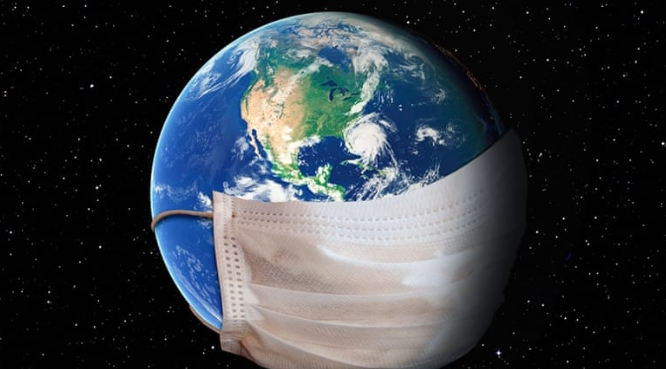